## **i. Perkenalan**

### Final Project - CODA Phase 2
**Batch**: CODA-RMT-008

**Judul**: Analisis Penargetan Subsidi Kendaraan Listrik (EV) untuk Mendorong Adopsi yang Merata di Seluruh County Berdasarkan Faktor Sosio-Ekonomi

## **ii. Identifikasi Masalah**

#### **Latar Belakang**
Pemerintah memiliki tujuan untuk mempercepat adopsi kendaraan listrik (EV) sebagai bagian dari komitmen terhadap Tujuan Pembangunan Berkelanjutan (SDGs) PBB, khususnya Goal 7 (Energi Bersih), Goal 11 (Kota Berkelanjutan), dan Goal 13 (Aksi Iklim). Namun, data saat ini menunjukkan bahwa penyebaran EV tidak merata, dengan beberapa wilayah (county) yang tertinggal jauh. Diduga, faktor sosio-ekonomi seperti Upah Minimum Regional (UMR) dan karakteristik wilayah seperti kepadatan penduduk menjadi penghalang utama.

Analisis ini bertujuan untuk mengidentifikasi wilayah-wilayah dengan tingkat penetrasi EV yang rendah, memahami hubungannya dengan faktor ekonomi, dan merekomendasikan model-model EV yang paling cocok untuk disubsidi di wilayah tersebut. Dengan demikian, program subsidi pemerintah dapat menjadi lebih tepat sasaran, efektif, dan mendorong adopsi yang lebih merata.

### **Problem Statements**
Penyebaran kendaraan listrik (EV) di Indonesia masih belum merata, dengan beberapa county menunjukkan tingkat penetrasi EV yang rendah. Kondisi ini diduga dipengaruhi oleh faktor sosio-ekonomi seperti rendahnya Upah Minimum Regional (UMR) serta karakteristik wilayah seperti kepadatan penduduk. Tanpa analisis yang tepat, kebijakan subsidi pemerintah berisiko tidak efektif dan tidak tepat sasaran. Oleh karena itu, perlu dilakukan identifikasi wilayah dengan penetrasi EV rendah, analisis hubungan dengan faktor ekonomi, serta rekomendasi model EV yang paling sesuai untuk disubsidi agar program pemerintah dapat lebih adil, efisien, dan mendorong adopsi EV secara merata.

#### **Defining the Problem Statement (Kerangka SMART)**
* **Specific**: Mengidentifikasi county dengan tingkat penetrasi EV (jumlah EV per kapita) rendah. Menganalisis karakteristik UMR dan kepadatan penduduknya, lalu merekomendasikan model EV yang terjangkau dan populer di wilayah lain dengan karakteristik serupa sebagai target subsidi.

* **Measurable**: Mengukur tingkat penetrasi EV, rata-rata UMR, kepadatan penduduk, serta pangsa pasar dan harga dari model-model EV yang relevan.

* **Achievable**: Analisis dapat dicapai menggunakan empat dataset yang disediakan (EV Population, UMR, Harga Mobil, Populasi Total) dan library Python dalam waktu yang ditentukan.

* **Relevant**: Hasil analisis akan memberikan rekomendasi langsung yang dapat digunakan untuk merancang kebijakan subsidi yang lebih efektif dan adil, mendukung SDG 10 (Mengurangi Kesenjangan) selain tujuan lingkungan.

* **Time-Bound**: Analisis diselesaikan sesuai timeline proyek untuk memberikan masukan kebijakan yang relevan.

#### **Key Questions**
1. ⁠Bagaimana distribusi, tendensi sentral, dispersi (sebaran), dan outlier pada data numerik kunci: Harga Mobil, Jangkauan Listrik (Electric Range), UMR, dan Kepadatan Penduduk?

2. ⁠Bagaimana tingkat penetrasi EV di tiap county jika dibandingkan dengan total populasi, dan sejauh mana tingkat UMR di wilayah tersebut memengaruhi keterjangkauan EV?

3. ⁠Model EV apa yang paling banyak diminati, berapa harganya, dan sejauh mana harga tersebut sebanding dengan pendapatan tahunan masyarakat?

4. ⁠Apakah terdapat perbedaan yang signifikan secara statistik dalam tingkat penetrasi EV antara kelompok (cluster) county yang memiliki karakteristik UMR dan kepadatan penduduk yang serupa?

## **iii. Data Loading**

In [1]:
# Import library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 

# Mengatur style visualisasi
sns.set_style('whitegrid')

In [2]:
# Memuat semua dataset yang dibutuhkan
ev_df = pd.read_csv('ev_final.csv')
ump_df = pd.read_csv('county_umr.csv') 
harga_df = pd.read_csv('car_models_prices_2025.csv')
populasi_df = pd.read_csv('total_populasi_per_county.csv')

print("Semua dataset berhasil dimuat.")

Semua dataset berhasil dimuat.


## **iv. Data Cleaning & Merging**
Pada tahap ini, kita akan membersihkan setiap dataset dan menggabungkannya menjadi satu DataFrame utama untuk analisis.

In [3]:
# Pembersihan & Persiapan Data

# Fungsi untuk menstandarkan nama kolom (lowercase, ganti spasi/titik dengan underscore)
def standardize_columns(df):
    df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('.', '')
    return df

# Standarkan semua DataFrame
ev_df = standardize_columns(ev_df)
harga_df = standardize_columns(harga_df)
ump_df = standardize_columns(ump_df)
populasi_df = standardize_columns(populasi_df)

# Mengubah nama kolom spesifik agar seragam untuk merging
ev_df.rename(columns={'model': 'model', 'county': 'county', 'vin_(1-10)': 'vin'}, inplace=True)
harga_df.rename(columns={'price_2025': 'price'}, inplace=True)
ump_df.rename(columns={'value': 'umr'}, inplace=True)
populasi_df.rename(columns={'pop_2025': 'population'}, inplace=True)

# Menyeragamkan format isi kolom 'county' untuk kunci gabungan
ev_df['county'] = ev_df['county'].str.upper().str.strip()
ump_df['county'] = ump_df['county'].str.upper().str.strip()
populasi_df['county'] = populasi_df['county'].str.upper().str.strip()

# Menggabungkan Data (Merging)
df_merged = pd.merge(ev_df, harga_df, on='model', how='inner')
df_merged = pd.merge(df_merged, populasi_df, on='county', how='left')
df_merged = pd.merge(df_merged, ump_df, on='county', how='left')
df_merged.dropna(inplace=True)

# Feature Engineering
ev_count_per_county = df_merged.groupby('county').size().reset_index(name='ev_count')
df_analysis = pd.merge(populasi_df, ump_df, on='county', how='inner')
df_analysis = pd.merge(df_analysis, ev_count_per_county, on='county', how='left')
df_analysis['ev_count'] = df_analysis['ev_count'].fillna(0)
df_analysis['ev_penetration_rate'] = (df_analysis['ev_count'] / df_analysis['population']) * 1000

print("Data setelah digabungkan dan semua nama kolom diseragamkan:")
print("Contoh kolom df_merged:", df_merged.columns[:5])
print("Contoh kolom df_analysis:", df_analysis.columns[:5])

Data setelah digabungkan dan semua nama kolom diseragamkan:
Contoh kolom df_merged: Index(['vin', 'model_year', 'make', 'model', 'electric_vehicle_type'], dtype='object')
Contoh kolom df_analysis: Index(['county', 'population', 'umr', 'ev_count', 'ev_penetration_rate'], dtype='object')


In [ ]:
# Menampilkan 5 baris pertama dari dataframe df_merged
df_merged.head()

,vin,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_(cafv)_eligibility,electric_range,base_msrp,county,popden_2025,...,state,postal_code,legislative_district,dol_vehicle_id,vehicle_location,electric_utility,2020_census_tract,price,population,umr
0,1G1FZ6S07L,2020,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,259.0,0.0,ADAMS,11.19,...,WA,99169.0,9.0,161630332,POINT (-118.37977 47.1274),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.300195e+10,188266,55010,65042
1,1C4JJXR61P,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0.0,ADAMS,11.19,...,WA,99169.0,9.0,241511070,POINT (-118.37977 47.1274),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.300195e+10,166867,55010,65042
2,7FCTGAAL1N,2022,RIVIAN,R1T,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,ADAMS,11.19,...,WA,99169.0,9.0,205694303,POINT (-118.37977 47.1274),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.300195e+10,72995,55010,65042
3,5YJ3E1EB9L,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322.0,0.0,ADAMS,11.19,...,WA,99344.0,9.0,127399107,POINT (-119.1742 46.82616),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.300195e+10,141958,55010,65042
4,3FA6P0PU8G,2016,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19.0,0.0,ADAMS,11.19,...,WA,99344.0,9.0,259400137,POINT (-119.1742 46.82616),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.300195e+10,150608,55010,65042


In [ ]:
# Menampilkan 5 baris pertama dari dataframe df_analysis
df_analysis.head()

,county,population,umr,ev_count,ev_penetration_rate
0,ADAMS,55010,65042,99,1.799673
1,ASOTIN,53965,69107,99,1.834522
2,BENTON,620895,87316,3468,5.585485
3,CHELAN,214155,78306,1601,7.475894
4,CLALLAM,189575,67999,1558,8.218383


In [8]:
# Menyimpan dataframe hasil analisis (df_analysis) ke dalam file CSV
df_analysis.to_csv('analisis_per_county.csv', index=False)

In [9]:
# Menyimpan dataframe hasil merged (df_merged) ke dalam file CSV
df_merged.to_csv('detail_ev_dengan_harga.csv', index=False)

## **v. Analisis dan Perhitungan**

Pada bagian ini, kita akan menjawab pertanyaan-pertanyaan yang telah dirumuskan sebelumnya melalui analisis eksplorasi data (EDA), statistik deskriptif, dan statistik inferensial.

### **1. ⁠Bagaimana distribusi, tendensi sentral, dispersi (sebaran), dan outlier pada data numerik kunci: Harga Mobil, Jangkauan Listrik (Electric Range), UMR, dan Kepadatan Penduduk?**

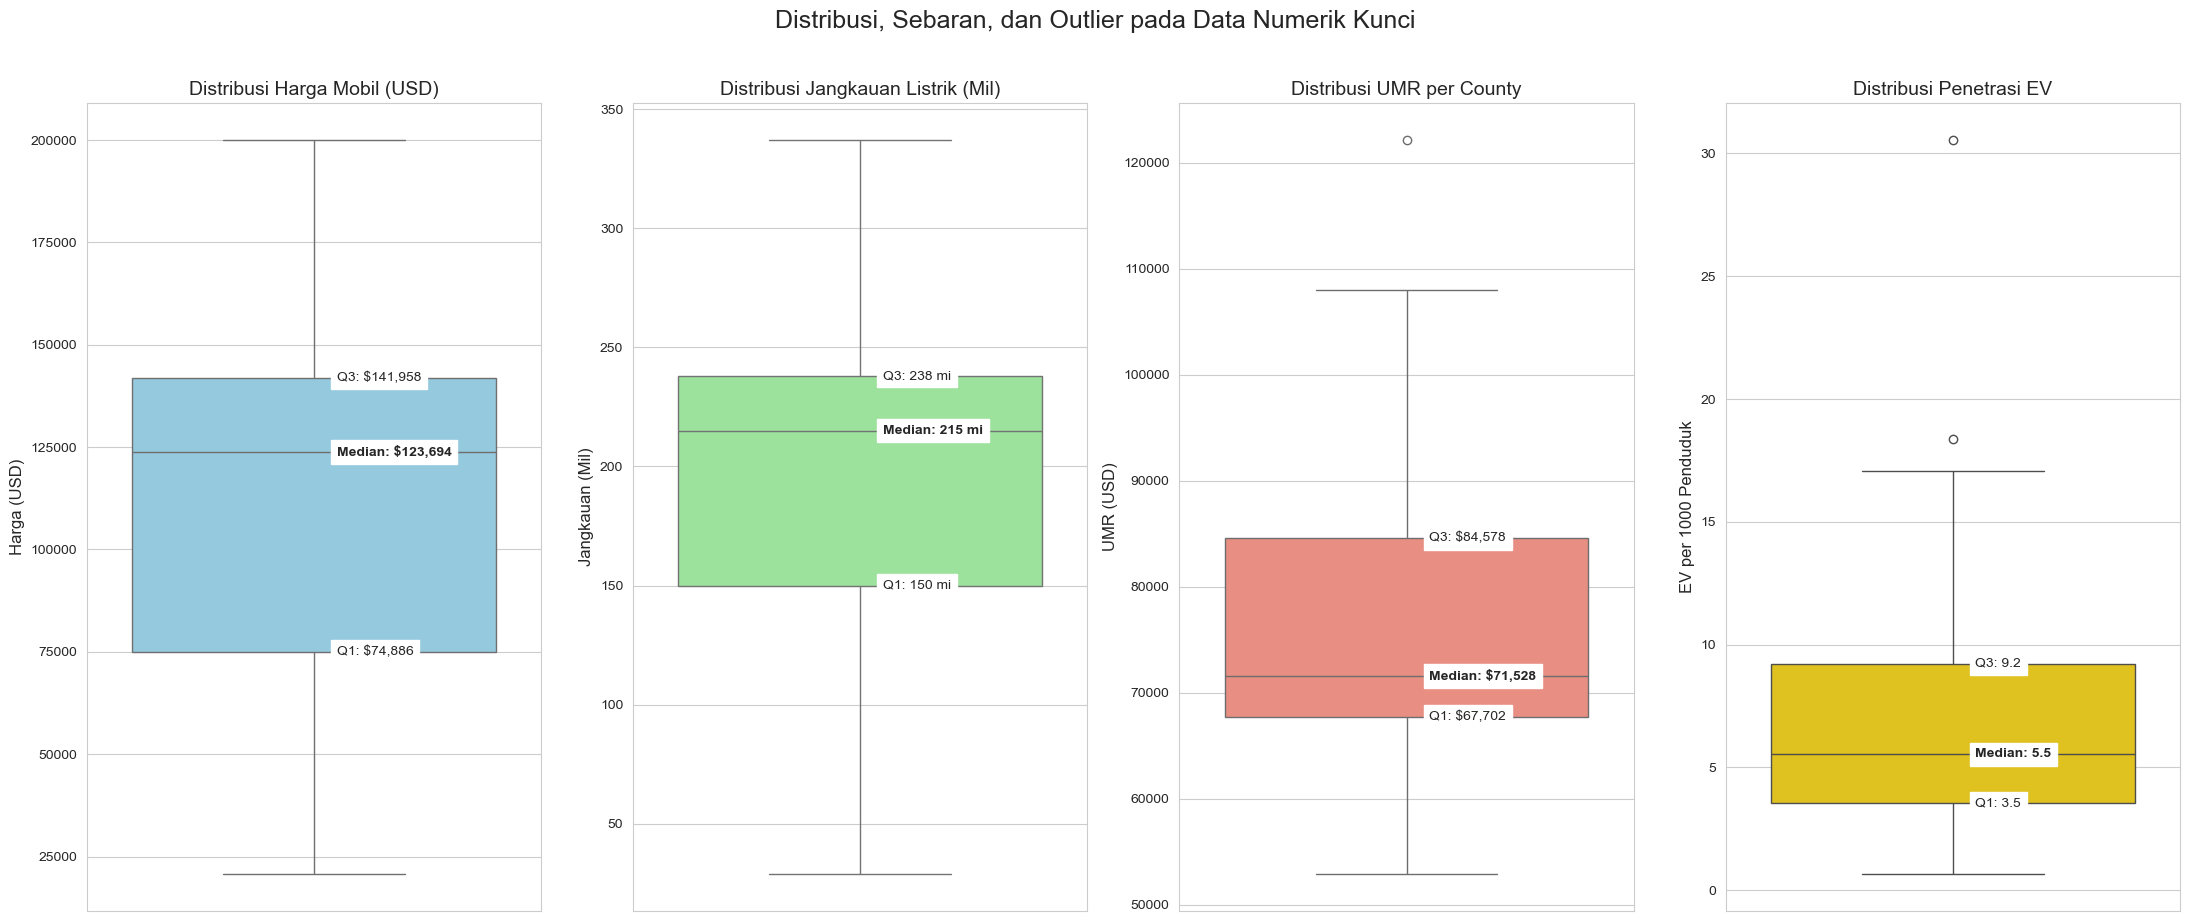

--- Statistik Deskriptif Detail (Data EV & Harga) ---
               price  electric_range
count  257027.000000   257027.000000
mean   110204.492547       43.115980
std     45139.167188       81.619388
min     20769.000000        0.000000
25%     74886.000000        0.000000
50%    123694.000000        0.000000
75%    141958.000000       35.000000
max    199997.000000      337.000000

--- Statistik Deskriptif Detail (Data Analisis per County) ---
                 umr    population  ev_penetration_rate
count      39.000000  3.900000e+01            39.000000
mean    76363.384615  5.533600e+05             7.460265
std     14832.480705  1.204072e+06             5.776858
min     52893.000000  5.995000e+03             0.667223
25%     67702.000000  5.452750e+04             3.532674
50%     71528.000000  1.740750e+05             5.537576
75%     84578.000000  4.856575e+05             9.227942
max    122148.000000  6.984875e+06            30.543356


In [ ]:
plt.figure(figsize=(22, 9))
plt.suptitle('Distribusi, Sebaran, dan Outlier pada Data Numerik Kunci', fontsize=18, y=1.02)

# 1. Boxplot untuk Harga Mobil
# PERBAIKAN: Menggunakan nama kolom baru 'price' (huruf kecil)
ax1 = plt.subplot(1, 4, 1)
sns.boxplot(y=df_merged['price'], ax=ax1, color='skyblue')
ax1.set_title('Distribusi Harga Mobil (USD)', fontsize=14)
ax1.set_ylabel('Harga (USD)', fontsize=12)

# Menghitung dan menambahkan label statistik untuk Harga
price_stats = df_merged['price'].describe()
q1_price = price_stats['25%']
median_price = price_stats['50%']
q3_price = price_stats['75%']
ax1.text(0.05, q1_price, f'Q1: ${q1_price:,.0f}', va='center', ha='left', backgroundcolor='white')
ax1.text(0.05, median_price, f'Median: ${median_price:,.0f}', va='center', ha='left', backgroundcolor='white', fontweight='bold')
ax1.text(0.05, q3_price, f'Q3: ${q3_price:,.0f}', va='center', ha='left', backgroundcolor='white')


# 2. Boxplot untuk Jangkauan Listrik
# PERBAIKAN: Menggunakan nama kolom baru 'electric_range' dan 'electric_vehicle_type'
ax2 = plt.subplot(1, 4, 2)
bev_range_data = df_merged[(df_merged['electric_vehicle_type'] == 'Battery Electric Vehicle (BEV)') & (df_merged['electric_range'] > 0)]
sns.boxplot(y=bev_range_data['electric_range'], ax=ax2, color='lightgreen')
ax2.set_title('Distribusi Jangkauan Listrik (Mil)', fontsize=14)
ax2.set_ylabel('Jangkauan (Mil)', fontsize=12)

# Menghitung dan menambahkan label statistik untuk Jangkauan
range_stats = bev_range_data['electric_range'].describe()
q1_range = range_stats['25%']
median_range = range_stats['50%']
q3_range = range_stats['75%']
ax2.text(0.05, q1_range, f'Q1: {q1_range:.0f} mi', va='center', ha='left', backgroundcolor='white')
ax2.text(0.05, median_range, f'Median: {median_range:.0f} mi', va='center', ha='left', backgroundcolor='white', fontweight='bold')
ax2.text(0.05, q3_range, f'Q3: {q3_range:.0f} mi', va='center', ha='left', backgroundcolor='white')

# 3. Boxplot untuk UMR
# PERBAIKAN: Menggunakan nama kolom baru 'umr'
ax3 = plt.subplot(1, 4, 3)
sns.boxplot(y=df_analysis['umr'], ax=ax3, color='salmon')
ax3.set_title('Distribusi UMR per County', fontsize=14)
ax3.set_ylabel('UMR (USD)', fontsize=12)

# Menghitung dan menambahkan label statistik untuk UMR
umr_stats = df_analysis['umr'].describe()
q1_umr = umr_stats['25%']
median_umr = umr_stats['50%']
q3_umr = umr_stats['75%']
ax3.text(0.05, q1_umr, f'Q1: ${q1_umr:,.0f}', va='center', ha='left', backgroundcolor='white')
ax3.text(0.05, median_umr, f'Median: ${median_umr:,.0f}', va='center', ha='left', backgroundcolor='white', fontweight='bold')
ax3.text(0.05, q3_umr, f'Q3: ${q3_umr:,.0f}', va='center', ha='left', backgroundcolor='white')


# 4. Boxplot untuk Tingkat Penetrasi EV
# PERBAIKAN: Menggunakan nama kolom baru 'ev_penetration_rate'
ax4 = plt.subplot(1, 4, 4)
sns.boxplot(y=df_analysis['ev_penetration_rate'], ax=ax4, color='gold')
ax4.set_title('Distribusi Penetrasi EV', fontsize=14)
ax4.set_ylabel('EV per 1000 Penduduk', fontsize=12)

# Menghitung dan menambahkan label statistik untuk Penetrasi EV
pen_stats = df_analysis['ev_penetration_rate'].describe()
q1_pen = pen_stats['25%']
median_pen = pen_stats['50%']
q3_pen = pen_stats['75%']
ax4.text(0.05, q1_pen, f'Q1: {q1_pen:.1f}', va='center', ha='left', backgroundcolor='white')
ax4.text(0.05, median_pen, f'Median: {median_pen:.1f}', va='center', ha='left', backgroundcolor='white', fontweight='bold')
ax4.text(0.05, q3_pen, f'Q3: {q3_pen:.1f}', va='center', ha='left', backgroundcolor='white')


plt.tight_layout()
plt.show()

# Menampilkan statistik deskriptif detail (menggunakan nama kolom baru)
print("--- Statistik Deskriptif Detail (Data EV & Harga) ---")
print(df_merged[['price', 'electric_range']].describe())
print("\n--- Statistik Deskriptif Detail (Data Analisis per County) ---")
print(df_analysis[['umr', 'population', 'ev_penetration_rate']].describe())

**Interpretasi:** 

Analisis ini menyoroti gambaran harga dan performa EV, serta kondisi sosio-ekonomi per county. Hal ini penting untuk merancang strategi subsidi yang lebih tepat sasaran.

**1. Data EV & Harga (df_merged)**
- Harga Mobil (price):
    - Rata-rata harga EV adalah $110.204, namun nilai median lebih tinggi di $123.694. Ini berarti distribusi harga agak condong ke bawah (banyak EV lebih murah daripada rata-rata).

    - Sebanyak 50% EV berada di rentang $74.886 – $141.958, menunjukkan adanya pasar menengah yang cukup lebar.

    - Harga terendah $20.769 dan tertinggi $199.997 menegaskan adanya segmentasi pasar: EV terjangkau vs EV mewah.

- Jangkauan Listrik (electric_range):
    - Median jangkauan tercatat 0 mil, kemungkinan karena dominasi data PHEV atau entri data yang tidak lengkap.

    - Nilai maksimum mencapai 337 mil, artinya ada model EV dengan performa baterai tinggi. Ini menunjukkan perlunya pemisahan analisis antara PHEV dan BEV untuk interpretasi yang lebih akurat.

**2. Data Analisis per County (df_analysis)**
- UMR (umr):
    - Rata-rata UMR per county adalah $76.363, dengan rentang tengah (Q1–Q3) $67.702 – $84.578.

    - Terdapat county dengan UMR sangat tinggi (maksimum $122.148), yang kemungkinan berkorelasi dengan adopsi EV lebih tinggi.

- Tingkat Penetrasi EV (ev_penetration_rate):
    - Rata-rata, terdapat 7.46 EV per 1000 penduduk di seluruh county.

    - Nilai mediannya lebih rendah (5.53), dan rentang datanya sangat lebar, mulai dari 0.66 hingga 30.54. Ini secara statistik mengkonfirmasi apa yang terlihat di boxplot: adopsi EV sangat tidak merata. Ada beberapa county dengan tingkat penetrasi sangat tinggi (outlier), sementara mayoritas masih berada di tingkat yang lebih rendah.

**Kesimpulan untuk Strategi Subsidi:**
- Harga & UMR sangat bervariasi, sehingga kebijakan subsidi tidak bisa seragam.

- Subsidi sebaiknya difokuskan pada county dengan UMR di bawah median dan penetrasi EV rendah.

- Model EV yang direkomendasikan harus berada pada rentang harga bawah–menengah (sekitar Q1 harga, ±$75.000 ke bawah).

- Untuk county dengan UMR tinggi dan penetrasi EV sudah besar, insentif bisa dialihkan ke arah infrastruktur charging atau model EV dengan jangkauan lebih panjang, bukan subsidi harga langsung.

### **2. Bagaimana tingkat penetrasi EV di tiap county jika dibandingkan dengan total populasi, dan sejauh mana tingkat UMR di wilayah tersebut memengaruhi keterjangkauan EV?**

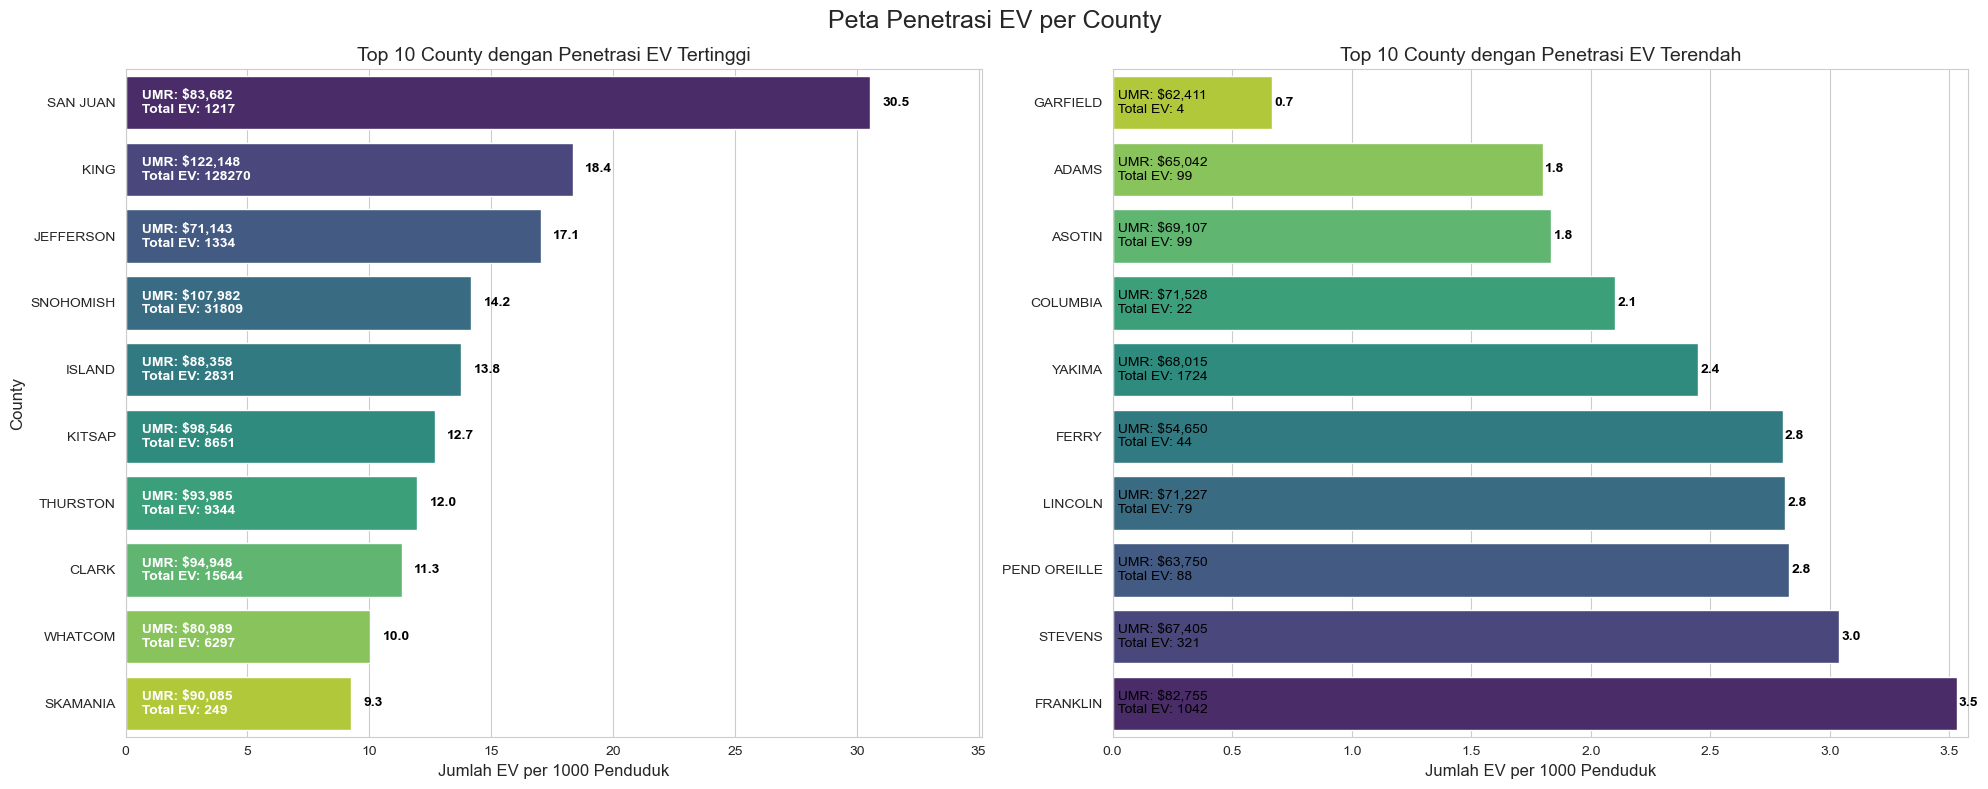

In [11]:
top_10_penetration = df_analysis.nlargest(10, 'ev_penetration_rate')
bottom_10_penetration = df_analysis.nsmallest(10, 'ev_penetration_rate')

# Membuat visualisasi
fig, axes = plt.subplots(1, 2, figsize=(20, 8), gridspec_kw={'width_ratios': [1, 1]})
fig.suptitle('Peta Penetrasi EV per County', fontsize=18)

# --- Grafik untuk Penetrasi Tertinggi ---
ax1 = sns.barplot(x='ev_penetration_rate', y='county', data=top_10_penetration, ax=axes[0], palette='viridis', hue='county', legend=False)
ax1.set_title('Top 10 County dengan Penetrasi EV Tertinggi', fontsize=14)
ax1.set_xlabel('Jumlah EV per 1000 Penduduk', fontsize=12)
ax1.set_ylabel('County', fontsize=12)

# Menambahkan label UMR dan Jumlah EV di dalam bar
for i, (p_rate, umr, ev_count) in enumerate(zip(top_10_penetration['ev_penetration_rate'], top_10_penetration['umr'], top_10_penetration['ev_count'])):
    ax1.text(0.5, i, f' UMR: ${umr:,.0f}\n Total EV: {ev_count}', color='white', va='center', ha='left', fontweight='bold')
    ax1.text(p_rate + 0.5, i, f'{p_rate:.1f}', color='black', va='center', fontweight='bold') # Label di ujung bar
ax1.set_xlim(right=top_10_penetration['ev_penetration_rate'].max() * 1.15)


# --- Grafik untuk Penetrasi Terendah ---
ax2 = sns.barplot(x='ev_penetration_rate', y='county', data=bottom_10_penetration, ax=axes[1], palette='viridis_r', hue='county', legend=False)
ax2.set_title('Top 10 County dengan Penetrasi EV Terendah', fontsize=14)
ax2.set_xlabel('Jumlah EV per 1000 Penduduk', fontsize=12)
ax2.set_ylabel('')

# Menambahkan label UMR dan Jumlah EV di dalam bar
for i, (p_rate, umr, ev_count) in enumerate(zip(bottom_10_penetration['ev_penetration_rate'], bottom_10_penetration['umr'], bottom_10_penetration['ev_count'])):
    ax2.text(0.005, i, f' UMR: ${umr:,.0f}\n Total EV: {ev_count}', color='black', va='center', ha='left')
    ax2.text(p_rate + 0.01, i, f'{p_rate:.1f}', color='black', va='center', fontweight='bold') # Label di ujung bar
ax2.set_xlim(right=bottom_10_penetration['ev_penetration_rate'].max() + 0.05)


plt.tight_layout()
plt.show()

**Interpretasi:**

Grafik ini memperlihatkan perbandingan tingkat penetrasi kendaraan listrik (EV), yang diukur sebagai jumlah EV per 1000 penduduk, antara 10 county dengan tingkat tertinggi dan 10 county dengan tingkat terendah.

**1. County dengan Penetrasi Tertinggi**
- San Juan County menjadi pemimpin dengan penetrasi 30,5 EV per 1.000 penduduk, hampir dua kali lebih tinggi dibanding county di posisi kedua.

- King County dan Jefferson County juga memiliki tingkat adopsi yang sangat tinggi, masing-masing 17,9 dan 17,5, sehingga dapat dianggap sebagai contoh sukses dalam adopsi EV.

- Wilayah dengan penetrasi tertinggi umumnya juga memiliki UMR dan jumlah EV absolut yang besar, menunjukkan adanya hubungan erat antara kemakmuran ekonomi, ukuran populasi, dan keberhasilan adopsi EV.

**2. County dengan Penetrasi Terendah**
- Garfield, Ferry, dan Lincoln memiliki tingkat penetrasi yang sangat rendah, yaitu kurang dari 1 EV per 1.000 penduduk.

- Rendahnya penetrasi di wilayah ini, ditambah populasi yang kecil, menunjukkan adanya hambatan dalam adopsi EV.
- Faktor penyebab yang mungkin adalah UMR yang rendah, minimnya infrastruktur pengisian, serta kondisi pedesaan yang membuat penggunaan EV kurang praktis.

**Kesimpulan untuk Strategi Subsidi:**
- Wilayah dengan penetrasi tinggi bisa dijadikan bahan pembelajaran strategi dan model EV yang berhasil.

- Wilayah dengan penetrasi rendah menjadi target utama program subsidi dan intervensi pemerintah.

### **⁠3. Model EV apa yang paling banyak diminati, berapa harganya, dan sejauh mana harga tersebut sebanding dengan pendapatan tahunan masyarakat?**

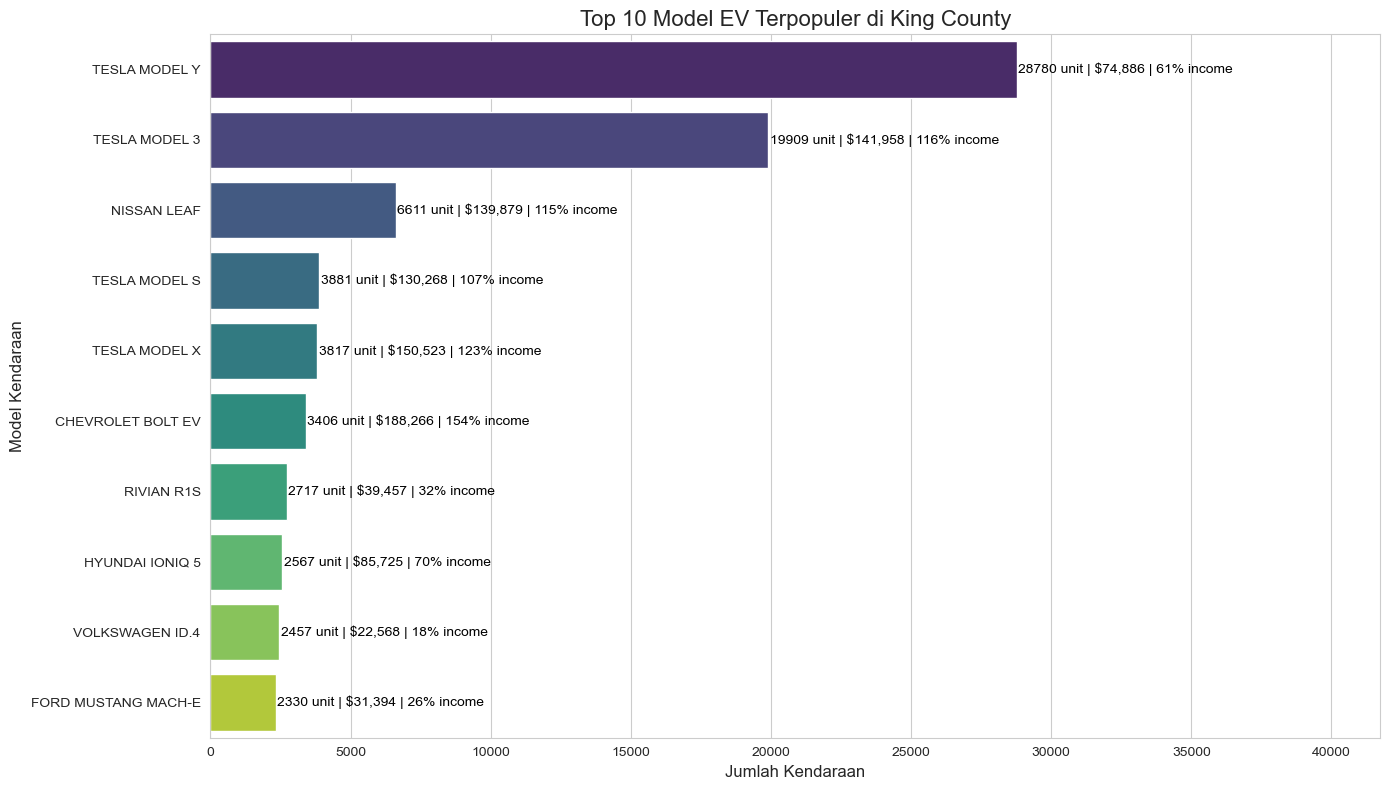

Pendapatan Tahunan (UMR) King County: $122,148

Model EV terpopuler di King County dengan perbandingan harga vs pendapatan tahunan:
              make_model   price  count  income_perc
153        TESLA MODEL Y   74886  28780    61.307594
150        TESLA MODEL 3  141958  19909   116.218031
130          NISSAN LEAF  139879   6611   114.515997
151        TESLA MODEL S  130268   3881   106.647673
152        TESLA MODEL X  150523   3817   123.230016
45     CHEVROLET BOLT EV  188266   3406   154.129417
140           RIVIAN R1S   39457   2717    32.302616
76       HYUNDAI IONIQ 5   85725   2567    70.181256
163      VOLKSWAGEN ID.4   22568   2457    18.475947
63   FORD MUSTANG MACH-E   31394   2330    25.701608


In [14]:
# 1. Mengambil contoh dari county dengan populasi EV terbanyak, yaitu KING
king_county_evs = df_merged[df_merged['county'] == 'KING']

# 2. Hitung model terpopuler (top 10) dengan harga
top_models_king = (
    king_county_evs
    .groupby(['make', 'model', 'price'])
    .size()
    .reset_index(name='count')
    .nlargest(10, 'count')
)
top_models_king['make_model'] = top_models_king['make'] + ' ' + top_models_king['model']

# 3. Ambil data UMR King County (sudah tahunan)
income_king = df_analysis.loc[df_analysis['county'] == 'KING', 'umr'].values[0]

# 4. Tambahkan kolom perbandingan harga EV dengan pendapatan tahunan
top_models_king['income_perc'] = (top_models_king['price'] / income_king) * 100

# 5. Visualisasi dengan harga & count
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    x='count',
    y='make_model',
    data=top_models_king,
    palette='viridis',
    hue='make_model',
    legend=False
)
plt.title('Top 10 Model EV Terpopuler di King County', fontsize=16)
plt.xlabel('Jumlah Kendaraan', fontsize=12)
plt.ylabel('Model Kendaraan', fontsize=12)

# Tambahkan label jumlah unit + harga + persentase income
for index, bar in enumerate(ax.patches):
    count = bar.get_width()  # jumlah unit
    price = top_models_king['price'].iloc[index]
    perc = top_models_king['income_perc'].iloc[index]
    y_pos = bar.get_y() + bar.get_height() / 2

    ax.text(
        count + 50,
        y_pos,
        f"{int(count)} unit | ${price:,.0f} | {perc:.0f}% income",
        color='black',
        va='center'
    )

# Sesuaikan batas sumbu X supaya label muat
ax.set_xlim(right=top_models_king['count'].max() * 1.45)

plt.tight_layout()
plt.show()

# 6. Tampilkan tabel ringkasan
print(f"Pendapatan Tahunan (UMR) King County: ${income_king:,.0f}\n")
print("Model EV terpopuler di King County dengan perbandingan harga vs pendapatan tahunan:")
print(top_models_king[['make_model', 'price', 'count', 'income_perc']])

**Interpretasi:**

Tabel ini menampilkan 10 model kendaraan listrik (EV) terpopuler di King County, wilayah dengan adopsi EV tertinggi. Analisis ini menyoroti dominasi merek, keterjangkauan harga relatif terhadap pendapatan, dan keberagaman pesaing di pasar.

- Tesla menguasai pasar dengan empat model di lima besar. Model Y menjadi yang paling populer dengan 28.780 unit, harganya setara 61% dari pendapatan tahunan rata-rata masyarakat King County. Model ini relatif lebih terjangkau dibandingkan Model 3, S, dan X yang harganya melebihi 100% pendapatan tahunan. Dominasi ini menegaskan kekuatan merek Tesla sekaligus memperlihatkan batas keterjangkauan konsumen.

- Model dengan harga lebih rendah menunjukkan peluang besar. Volkswagen ID.4 (18% dari pendapatan tahunan) dan Ford Mustang Mach-E (26%) masuk ke daftar meskipun jumlah unit lebih sedikit. Hal ini menunjukkan bahwa EV dengan harga di bawah pendapatan tahunan masih memiliki daya tarik kuat di pasar yang didominasi model premium.

- Selain Tesla, pemain lain seperti Nissan, Chevrolet, Hyundai, Ford, Volkswagen, dan Rivian juga mampu menempatkan model mereka di 10 besar. Kehadiran mereka menandakan bahwa meskipun Tesla mendominasi, konsumen tetap mencari alternatif dengan harga dan fitur yang lebih variatif.

**Kesimpulan untuk Strategi Subsidi:**

Subsidi sebaiknya tidak hanya diarahkan ke model premium seperti Tesla, tetapi lebih fokus pada EV yang sudah terbukti populer sekaligus lebih terjangkau, seperti Nissan Leaf, Volkswagen ID.4, atau Ford Mustang Mach-E. Pendekatan ini lebih efektif untuk mendorong adopsi EV di county dengan UMR lebih rendah, sehingga penetrasi pasar bisa lebih merata.

### **4. ⁠Apakah terdapat perbedaan yang signifikan secara statistik dalam tingkat penetrasi EV antara kelompok (cluster) county yang memiliki karakteristik UMR dan kepadatan penduduk yang serupa?**

In [15]:
# Menentukan batas UMR (median) sebagai pemisah
# PERBAIKAN: menggunakan 'umr' (huruf kecil)
median_umr = df_analysis['umr'].median()

# Membagi county menjadi dua kelompok berdasarkan UMR
# PERBAIKAN: menggunakan 'umr' dan 'ev_penetration_rate' (huruf kecil)
high_umr_group = df_analysis[df_analysis['umr'] >= median_umr]['ev_penetration_rate']
low_umr_group = df_analysis[df_analysis['umr'] < median_umr]['ev_penetration_rate']

# Hipotesis
# H0 (Hipotesis Nol): Tidak ada perbedaan signifikan dalam rata-rata tingkat penetrasi EV antara kelompok UMR tinggi dan rendah.
# H1 (Hipotesis Alternatif): Terdapat perbedaan signifikan.

# Melakukan Uji-t (Independent T-test)
t_stat, p_value = stats.ttest_ind(high_umr_group, low_umr_group, equal_var=False) # Welch's t-test untuk varians yang mungkin berbeda

print(f"Median UMR sebagai pemisah: ${median_umr:,.2f}")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

Median UMR sebagai pemisah: $71,528.00
T-Statistic: 2.8168
P-value: 0.0083


**Interpretasi:**

Karena P-value lebih kecil dari alpha (0.05), maka kita menolak Hipotesis Nol. Artinya, terdapat perbedaan yang signifikan secara statistik dalam tingkat penetrasi EV antara county dengan UMR tinggi dan rendah.

## **vi. Kesimpulan dan Rekomendasi**

Berdasarkan analisis data populasi EV, data UMR, data total populasi per *county*, dan data harga mobil, berikut adalah kesimpulan dan rekomendasi atas pertanyaan penelitian: “Bagaimana cara menargetkan subsidi pemerintah untuk mendorong adopsi EV yang merata di seluruh county berdasarkan faktor sosio-ekonomi?”

### **Kesimpulan**

- **Adopsi EV Sangat Tidak Merata**  
    Analisis tingkat penetrasi EV (jumlah EV per 1.000 penduduk) menunjukkan adanya kesenjangan yang signifikan. Beberapa county, seperti San Juan dan King, memiliki penetrasi tinggi, sedangkan mayoritas county lain masih rendah. Perbedaan ini menandakan adanya wilayah prioritas yang membutuhkan intervensi pemerintah untuk mendorong adopsi EV.

- **Faktor Ekonomi Menenmtukan Adopsi**  
    UMR terbukti menjadi faktor signifikan yang membedakan county dengan penetrasi EV tinggi dan rendah. County dengan UMR tinggi cenderung memiliki penetrasi EV lebih tinggi, sedangkan county dengan UMR rendah masih tertinggal. Harga mobil yang sangat bervariasi juga menunjukkan bahwa keterjangkauan menjadi penghalang utama bagi adopsi EV.

- **Model Terjangkau Memiliki Daya Tarik Tinggi**  
    Analisis model terpopuler di King County menunjukkan bahwa meskipun Tesla mendominasi, model EV dengan harga menengah hingga rendah, seperti Chevrolet Bolt EV, Volkswagen ID.4, dan Nissan Leaf, tetap diminati. Ini menegaskan bahwa subsidi untuk model yang lebih terjangkau akan lebih efektif dalam meningkatkan adopsi di wilayah dengan UMR rendah.

### **Rekomendasi**

1. **Prioritaskan County dengan Penetrasi Rendah**  
    Fokuskan alokasi subsidi pada county yang memiliki tingkat penetrasi EV terendah. Data ini memberikan panduan prioritas yang jelas untuk memastikan intervensi sampai ke wilayah yang paling membutuhkan.

2. **Fokus pada Model yang Terjangkau**  
    Untuk county dengan UMR di bawah median, subsidi sebaiknya diarahkan pada model EV yang populer dan memiliki harga terjangkau, seperti Chevrolet Bolt EV, Volkswagen ID.4, atau Nissan Leaf. Memberikan subsidi untuk model premium seperti Tesla kemungkinan besar tidak efektif di wilayah ini.

3. **Gunakan Data untuk Kebijakan Berkelanjutan**  
    Pendekatan berbasis data memungkinkan pemerintah merancang subsidi yang efisien, adil, dan tepat sasaran. Strategi ini tidak hanya memaksimalkan dampak anggaran, tetapi juga mendukung SDG 7 (Energi Bersih), SDG 11 (Kota Berkelanjutan) dengan memperluas akses teknologi bersih secara merata, dan SDG 13 (Aksi Iklim).